In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
# just saying 'where is your datbase is located'
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found: essentially looking at all the
# table we have in 'hawaii.sqlite'. 
# Double check the tables & columns using:https://inloop.github.io/sqlite-viewer/
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
# creating an assignment for these tables so we can pull data in
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB 'loggin on'
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
#Check the column names in each tables
columns = inspect(engine).get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
columns = inspect(engine).get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# Find the first date in the data set.
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [15]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

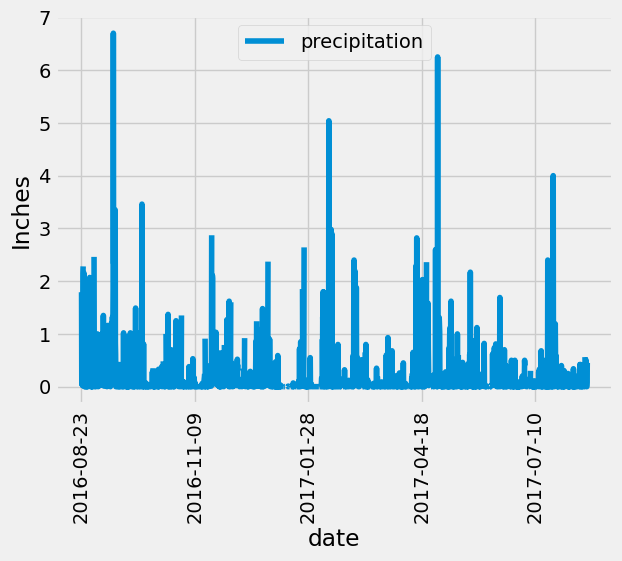

In [24]:
# Design a query to retrieve the last 12 months of precipitation data 
# and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date>=query_date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(prcp_scores, columns =["date", "precipitation"]).\
sort_values("date",ascending=True)
df.set_index(df["date"], inplace = True)

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot = 90)
plt.ylabel('Inches')
plt.show()



In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [29]:
# Design a query to find the most active stations 
#(i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_rows = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
station_rows

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the most active station id from the previous query,
# calculate the lowest, highest, and average temperature(TOBS).
sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
tobs_query = session.query(*sel).\
filter(Measurement.station == "USC00519281").all()


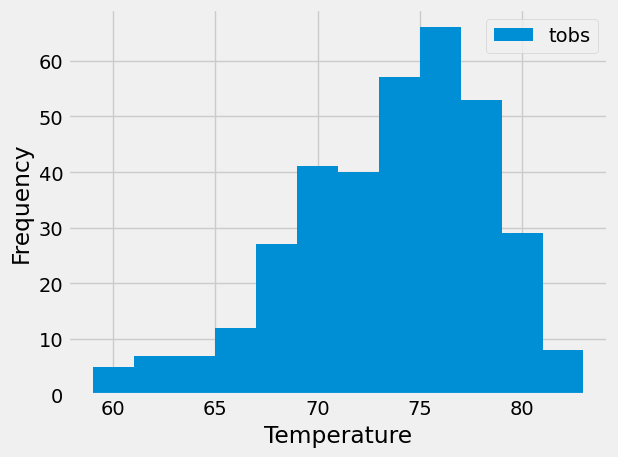

In [36]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
# and plot the results as a histogram
query_temperature = session.query(Measurement.tobs).\
filter(Measurement.station == "USC00519281").\
filter(Measurement.date >= query_date).all()
df2 = pd.DataFrame(query_temperature, columns = ["tobs"])
df2.plot.hist(bins = 12)
plt.xlabel('Temperature')
plt.tight_layout()

# Close session

In [37]:
# Close Session
session.close()